# Test

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!yolo predict task=detect model=yolov8n.pt source="/content/AI_Challenge.jpg"

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/AI_Challenge.jpg: 448x640 5 persons, 1 tv, 77.8ms
Speed: 18.9ms preprocess, 77.8ms inference, 2954.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Work with data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

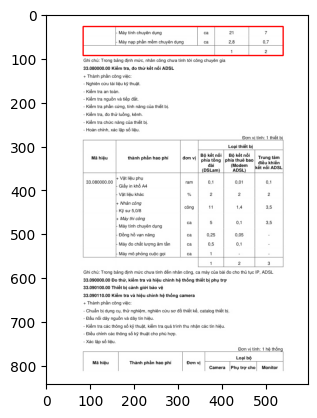

In [ ]:
path = "/content/drive/MyDrive/data/publaynet/train/images"
train_content = json.load(open("/content/drive/MyDrive/data/publaynet/train.json"))
file_name = os.path.join(path, train_content["images"][0]["file_name"])

image = cv2.imread(file_name)
bbox = train_content["annotations"][0]["bbox"]
image = cv2.rectangle(image, (int(bbox[0]), int(bbox[1])), \
                     ((int(bbox[0]) + int(bbox[2])), (int(bbox[1]) + int(bbox[3]))), \
                     color = (255, 0, 0), thickness = 2)

# image = cv2.rectangle(image, (int(bbox[0]), int(bbox[1])), ((int(bbox[0]) + int(bbox[2])), (int(bbox[1]) + int(bbox[3]))), color = (255, 0, 0))
plt.imshow(image)


In [ ]:
path = "/content/drive/MyDrive/data/publaynet/train.json"
train_content = json.load(open(path))
for key in train_content:
  print(key)

print(train_content["images"][0], "\n")
print(train_content["annotations"][0], "\n")
print(train_content["categories"][0], "\n")

images
annotations
categories
{'id': 71744, 'file_name': '44_2020_TTBTTTT_463630_page_157.jpg', 'height': 842, 'width': 596} 

{'bbox': [84.31922611850062, 28.562713797035293, 455.7081821846029, 66.00627137970355], 'bbox_mode': 1, 'category_id': 3, 'image_id': 71744, 'id': 0, 'iscrowd': 0, 'area': 30079.597943228284} 

{'id': 0, 'name': 'text'} 



In [ ]:
train_path = "/content/drive/MyDrive/data/publaynet/train"
val_path = "/content/drive/MyDrive/data/publaynet/val"

train_info = "/content/drive/MyDrive/data/publaynet/train.json"
val_info = "/content/drive/MyDrive/data/publaynet/val.json"

if not os.path.exists(os.path.join(train_path, "labels")):
  os.makedirs(os.path.join(train_path, "labels"))

if not os.path.exists(os.path.join(val_path, "labels")):
  os.makedirs(os.path.join(val_path, "labels"))

def normalize(image_size, bbox):
  """
     input box: [x_left, y_left, width, height]
     image_size: [img_width, img_height]
  """
  # return box: [x_center_norm, y_center_norm, width_norm, height_norm]

  x_center = (bbox[0] + bbox[2]/2)/image_size[0]
  y_center = (bbox[1] + bbox[3]/2)/image_size[1]
  width, height = bbox[2]/image_size[0], bbox[3]/image_size[1]

  return [x_center, y_center, width, height]


def write_info_to_file(train=True):
  """
     - write into labels_folder image file (type: .txt)
     - each line in the image file is infor about a bbox in the image:
        category_id x_center y_center width height
  """

  path = train_path if train else val_path
  path_info = train_info if train else val_info
  images_info = json.load(open(path_info))

  mark, num_annots = 0, len(images_info["annotations"])
  annots = images_info["annotations"]

  for image_info in images_info["images"]:
    image_name = image_info["file_name"]
    type_file = image_name[image_name.find('.') :] # type_image: .jpg, .png
    image_txt_file = image_name.strip(type_file) + ".txt"
    image_size = [image_info["width"], image_info["height"]]

    with open(image_txt_file, "w") as file:
      for id in range(mark, num_annots):
        if annots[id]["image_id"] == image_info["id"]:
          bbox = annots[id]["bbox"]
          category_id = annots[id]["category_id"]

          norm_box = normalize(image_size, bbox)
          file.write(str(category_id)); file.write(" ")
          for i in range(len(norm_box)):
            if i < len(bbox) - 1:
              file.write(str(norm_box[i])); file.write(" ")
            else:
              file.write(str(norm_box[i])); file.write("\n");
          mark += 1
        else:
          break

In [ ]:
%cd /content/drive/MyDrive/data/publaynet/train/labels

# if len(os.listdir("/content/drive/MyDrive/data/publaynet/train/labels")) != 0:
write_info_to_file()

/content/drive/MyDrive/data/publaynet/train/labels


In [ ]:
%cd /content/drive/MyDrive/data/publaynet/val/labels

# if len(os.listdir("/content/drive/MyDrive/data/publaynet/val/labels")) != 0:
write_info_to_file(train=False)

/content/drive/MyDrive/data/publaynet/val/labels


## Train model

In [ ]:
train_content["categories"]

[{'id': 0, 'name': 'text'},
 {'id': 1, 'name': 'title'},
 {'id': 2, 'name': 'useless'},
 {'id': 3, 'name': 'table'},
 {'id': 4, 'name': 'figure'}]

In [ ]:
%cd /content/drive/MyDrive/data/publaynet

!rm dataset.yaml

!echo "train: /content/drive/MyDrive/data/publaynet/train" >> dataset.yaml
!echo "val: /content/drive/MyDrive/data/publaynet/val" >> dataset.yaml
!echo "nc: 5" >> dataset.yaml
!echo "names: ['text', 'title', 'useless', 'table', 'figure']" >> dataset.yaml

/content/drive/MyDrive/data/publaynet


In [ ]:
from ultralytics import YOLO

model = YOLO("/content/best.pt")
results = model.train(data = "/content/drive/MyDrive/data/publaynet/dataset.yaml", epochs = 100)

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/best.pt, data=/content/drive/MyDrive/data/publaynet/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 17.2MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.2MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/data/publaynet/train/labels... 913 images, 23 backgrounds, 0 corrupt: 100%|██████████| 936/936 [05:35<00:00,  2.79it/s]


train: New cache created: /content/drive/MyDrive/data/publaynet/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/data/publaynet/val/labels... 397 images, 10 backgrounds, 0 corrupt: 100%|██████████| 407/407 [03:24<00:00,  1.99it/s]


val: New cache created: /content/drive/MyDrive/data/publaynet/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.08G     0.6429     0.9217     0.9056        136        640: 100%|██████████| 59/59 [00:43<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.45it/s]

                   all        407       4594      0.758      0.676      0.733      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.55G     0.6989     0.9827     0.9154        233        640: 100%|██████████| 59/59 [00:33<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]


                   all        407       4594      0.667      0.673      0.679      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.53G      0.715     0.9704     0.9229        159        640: 100%|██████████| 59/59 [00:37<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]

                   all        407       4594      0.718      0.624      0.674      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.72G     0.7332      0.987      0.927        254        640: 100%|██████████| 59/59 [00:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]


                   all        407       4594      0.674      0.629      0.663      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.38G     0.7458      1.002     0.9265        192        640: 100%|██████████| 59/59 [00:33<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]

                   all        407       4594      0.708      0.637      0.688      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.7G     0.7297     0.9858     0.9248        121        640: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        407       4594      0.711       0.64      0.678      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.53G     0.7011     0.9523     0.9186        267        640: 100%|██████████| 59/59 [00:40<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all        407       4594      0.641      0.709      0.704      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.75G     0.7407     0.9729     0.9144        123        640: 100%|██████████| 59/59 [00:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]

                   all        407       4594      0.658      0.621      0.642      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.49G     0.6987     0.9515     0.9139        190        640: 100%|██████████| 59/59 [00:36<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.18it/s]

                   all        407       4594      0.694      0.662      0.673      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.67G      0.697     0.9406     0.9118        142        640: 100%|██████████| 59/59 [00:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.66it/s]

                   all        407       4594      0.699      0.683      0.719      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.74G      0.709     0.9424     0.9189        143        640: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        407       4594      0.732      0.655      0.718      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.77G     0.6981     0.9567     0.9151        175        640: 100%|██████████| 59/59 [00:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.24it/s]

                   all        407       4594      0.645      0.651      0.661      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.66G     0.6828     0.9292     0.9066        210        640: 100%|██████████| 59/59 [00:37<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        407       4594       0.66      0.661      0.672      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.71G      0.683     0.9299     0.9124        176        640: 100%|██████████| 59/59 [00:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.37it/s]

                   all        407       4594      0.668      0.617      0.655      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.05G      0.682     0.9406     0.9148        218        640: 100%|██████████| 59/59 [00:33<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all        407       4594      0.701      0.633      0.688      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.93G     0.6777     0.9266     0.9189        204        640: 100%|██████████| 59/59 [00:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]

                   all        407       4594      0.656      0.618      0.656      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.98G     0.6662     0.9099     0.9127        283        640: 100%|██████████| 59/59 [00:39<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        407       4594      0.716      0.664      0.707      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.07G     0.6641     0.8953     0.9042        130        640: 100%|██████████| 59/59 [00:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]

                   all        407       4594      0.681      0.662      0.684      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.7G     0.6526     0.8884     0.9018        158        640: 100%|██████████| 59/59 [00:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all        407       4594      0.638      0.707      0.679      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.63G     0.6997     0.9151     0.9095        247        640: 100%|██████████| 59/59 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.19it/s]

                   all        407       4594      0.655      0.691      0.684      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.76G     0.6539     0.8703     0.9124        169        640: 100%|██████████| 59/59 [00:37<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.17it/s]

                   all        407       4594      0.675      0.653      0.683      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.81G     0.6497       0.88     0.9041        160        640: 100%|██████████| 59/59 [00:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.16it/s]

                   all        407       4594      0.671      0.675      0.686      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.55G     0.6572     0.8991      0.906        117        640: 100%|██████████| 59/59 [00:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]

                   all        407       4594      0.663      0.693        0.7      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.75G     0.6606     0.8962     0.9041        185        640: 100%|██████████| 59/59 [00:36<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]

                   all        407       4594      0.683      0.664      0.698      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.55G     0.6458     0.8738     0.9017        206        640: 100%|██████████| 59/59 [00:33<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.20it/s]

                   all        407       4594      0.752      0.675      0.737      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.72G     0.6375     0.8587     0.8988        192        640: 100%|██████████| 59/59 [00:38<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]

                   all        407       4594        0.7      0.716      0.724      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.54G     0.6279      0.846     0.8921        164        640: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]

                   all        407       4594       0.67      0.696      0.709      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.43G     0.6124     0.8493     0.8964        160        640: 100%|██████████| 59/59 [00:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.22it/s]

                   all        407       4594      0.737      0.666      0.728      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.77G     0.6185     0.8456     0.8912        169        640: 100%|██████████| 59/59 [00:35<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.66it/s]

                   all        407       4594      0.685      0.677      0.702      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.56G       0.61     0.8563      0.896        129        640: 100%|██████████| 59/59 [00:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]

                   all        407       4594      0.753      0.714      0.737      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.6G     0.6218     0.8668     0.8917        205        640: 100%|██████████| 59/59 [00:39<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.34it/s]

                   all        407       4594      0.724       0.68      0.734      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.84G     0.6181      0.836     0.8942        212        640: 100%|██████████| 59/59 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        407       4594      0.807      0.652      0.739       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.75G     0.6332     0.8723      0.897        196        640: 100%|██████████| 59/59 [00:37<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]

                   all        407       4594      0.742      0.653      0.706      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.72G     0.6399     0.8686     0.9084        133        640: 100%|██████████| 59/59 [00:33<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.25it/s]

                   all        407       4594      0.658      0.727      0.726      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.54G     0.6083     0.8463     0.8932        225        640: 100%|██████████| 59/59 [00:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]

                   all        407       4594      0.742      0.722      0.751      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.58G     0.6286       0.85     0.8954        156        640: 100%|██████████| 59/59 [00:41<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all        407       4594      0.712      0.662      0.722       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.78G     0.6068     0.8256     0.8885        150        640: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]

                   all        407       4594      0.681      0.708      0.722      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.72G     0.5941      0.823     0.8896        158        640: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]

                   all        407       4594      0.739      0.708      0.746        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.02G     0.6139     0.8484     0.8986        215        640: 100%|██████████| 59/59 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.36it/s]

                   all        407       4594      0.699       0.68      0.696       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.54G     0.6033     0.8162     0.8897        178        640: 100%|██████████| 59/59 [00:36<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]

                   all        407       4594       0.74      0.703      0.735      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.72G     0.6302     0.8432      0.893        215        640: 100%|██████████| 59/59 [00:40<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.19it/s]

                   all        407       4594       0.71      0.695      0.731        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.54G     0.5975     0.7922     0.8911        157        640: 100%|██████████| 59/59 [00:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        407       4594      0.714        0.7      0.726      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.7G     0.5909     0.8004     0.8897        176        640: 100%|██████████| 59/59 [00:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]

                   all        407       4594      0.757      0.678      0.728      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.37G     0.5866     0.8045     0.8868        182        640: 100%|██████████| 59/59 [00:35<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.34it/s]

                   all        407       4594      0.742      0.711      0.752      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.82G     0.5706     0.7817     0.8831        178        640: 100%|██████████| 59/59 [00:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all        407       4594      0.742      0.705      0.748      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.71G     0.5893     0.8148     0.8859        141        640: 100%|██████████| 59/59 [00:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.18it/s]

                   all        407       4594      0.724      0.707      0.752      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.61G     0.5866      0.798     0.8829        158        640: 100%|██████████| 59/59 [00:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]

                   all        407       4594      0.748       0.72      0.749      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.07G     0.5823     0.7909     0.8888        207        640: 100%|██████████| 59/59 [00:37<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]

                   all        407       4594      0.751      0.697      0.745      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.9G     0.5889     0.7985     0.8813        214        640: 100%|██████████| 59/59 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]

                   all        407       4594      0.728      0.692       0.73      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.63G     0.5727     0.7889     0.8846        221        640: 100%|██████████| 59/59 [00:39<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]

                   all        407       4594      0.758       0.69      0.737      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.59G     0.5646     0.7651     0.8783        174        640: 100%|██████████| 59/59 [00:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        407       4594      0.736      0.714      0.737      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.68G     0.5658     0.7748     0.8836        158        640: 100%|██████████| 59/59 [00:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        407       4594      0.713      0.682      0.717      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.73G      0.568      0.765     0.8826        208        640: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]

                   all        407       4594      0.747      0.708      0.745      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.63G     0.5612     0.7512     0.8837        235        640: 100%|██████████| 59/59 [00:34<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all        407       4594      0.753      0.746       0.77       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.84G     0.5595     0.7752     0.8789        167        640: 100%|██████████| 59/59 [00:40<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        407       4594      0.732        0.7      0.734      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.63G     0.5695     0.7744     0.8856        123        640: 100%|██████████| 59/59 [00:35<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        407       4594       0.73      0.709      0.743      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.84G     0.5623     0.7545       0.88        200        640: 100%|██████████| 59/59 [00:36<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        407       4594      0.743      0.725      0.751      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.85G       0.55     0.7422     0.8812        145        640: 100%|██████████| 59/59 [00:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]

                   all        407       4594      0.745      0.729      0.755      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.85G     0.5623     0.7504      0.881        186        640: 100%|██████████| 59/59 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.17it/s]

                   all        407       4594      0.743      0.713      0.756      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.17G     0.5436     0.7381     0.8727        202        640: 100%|██████████| 59/59 [00:41<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]

                   all        407       4594      0.777      0.698      0.743      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.58G     0.5472     0.7524     0.8783        161        640: 100%|██████████| 59/59 [00:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.17it/s]

                   all        407       4594      0.714      0.722      0.737      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.73G     0.5596     0.7334     0.8772        163        640: 100%|██████████| 59/59 [00:37<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]

                   all        407       4594      0.757      0.709      0.759      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.96G     0.5442      0.726     0.8737        148        640: 100%|██████████| 59/59 [00:37<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.49it/s]

                   all        407       4594      0.771      0.703      0.747      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.77G     0.5452     0.7318     0.8781        229        640: 100%|██████████| 59/59 [00:34<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.21it/s]

                   all        407       4594      0.694      0.723      0.741       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.11G     0.5576     0.7374     0.8795        191        640: 100%|██████████| 59/59 [00:39<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.61it/s]

                   all        407       4594      0.738      0.708      0.743      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.39G     0.5329     0.7177     0.8765        227        640: 100%|██████████| 59/59 [00:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all        407       4594      0.767      0.706       0.77      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.58G     0.5313      0.716     0.8776        227        640: 100%|██████████| 59/59 [00:35<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all        407       4594      0.745      0.704      0.754      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.84G       0.54     0.7083     0.8769        209        640: 100%|██████████| 59/59 [00:37<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]

                   all        407       4594      0.758      0.699      0.768      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.95G     0.5302     0.7068     0.8749        268        640: 100%|██████████| 59/59 [00:37<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.19it/s]

                   all        407       4594      0.763      0.699      0.754      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.72G     0.5362     0.7109      0.874        237        640: 100%|██████████| 59/59 [00:40<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]

                   all        407       4594      0.773      0.713      0.772      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.47G     0.5333     0.6958     0.8727        120        640: 100%|██████████| 59/59 [00:36<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.45it/s]

                   all        407       4594      0.726      0.739      0.759      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.59G     0.5166     0.6933     0.8726        172        640: 100%|██████████| 59/59 [00:33<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]

                   all        407       4594      0.785      0.701      0.762      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.72G     0.5347     0.6968     0.8741        216        640: 100%|██████████| 59/59 [00:36<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]

                   all        407       4594      0.785      0.683       0.75      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.71G     0.5266     0.6802      0.871        225        640: 100%|██████████| 59/59 [00:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.13it/s]

                   all        407       4594      0.754      0.728      0.761      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.7G     0.5205      0.686      0.875        195        640: 100%|██████████| 59/59 [00:39<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]

                   all        407       4594      0.703      0.771      0.769      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.66G     0.5344     0.6962     0.8719        215        640: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]

                   all        407       4594      0.756      0.728      0.759      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.77G     0.5103     0.6786     0.8689        219        640: 100%|██████████| 59/59 [00:33<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.34it/s]

                   all        407       4594      0.776      0.706      0.755      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.76G      0.521     0.6811      0.873        146        640: 100%|██████████| 59/59 [00:36<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        407       4594      0.763      0.714      0.746      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.69G     0.5142     0.6704     0.8707        154        640: 100%|██████████| 59/59 [00:37<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]

                   all        407       4594       0.79      0.706       0.77      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.53G     0.5072     0.6602     0.8687        179        640: 100%|██████████| 59/59 [00:39<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]

                   all        407       4594      0.712      0.776      0.775       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.03G     0.5266      0.675     0.8729        216        640: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]

                   all        407       4594      0.771      0.733      0.773      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.82G     0.5058     0.6676     0.8715        258        640: 100%|██████████| 59/59 [00:35<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.21it/s]

                   all        407       4594      0.754      0.732      0.767      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.93G     0.5046      0.646     0.8671        137        640: 100%|██████████| 59/59 [00:36<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]

                   all        407       4594      0.789      0.704      0.766      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.73G     0.5048     0.6463     0.8725        165        640: 100%|██████████| 59/59 [00:37<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        407       4594      0.743      0.744      0.767       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.67G     0.5022     0.6383     0.8681        196        640: 100%|██████████| 59/59 [00:39<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all        407       4594      0.734      0.762      0.768       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.79G     0.5085     0.6647     0.8692        185        640: 100%|██████████| 59/59 [00:36<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        407       4594      0.747       0.74      0.769      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.82G     0.5026     0.6362     0.8676        136        640: 100%|██████████| 59/59 [00:36<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.20it/s]

                   all        407       4594      0.785       0.72      0.778      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.99G     0.4946     0.6375     0.8675        147        640: 100%|██████████| 59/59 [00:35<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]

                   all        407       4594      0.735      0.721      0.752      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.79G     0.5008     0.6475     0.8694        198        640: 100%|██████████| 59/59 [00:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]

                   all        407       4594      0.784      0.701      0.759       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.59G     0.4872     0.6361     0.8655        198        640: 100%|██████████| 59/59 [00:37<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all        407       4594      0.694      0.765      0.763      0.639


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.64G     0.5105     0.6159     0.8426         56        640: 100%|██████████| 59/59 [00:38<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        407       4594      0.731      0.661      0.711      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.18G     0.4917     0.5909     0.8368         72        640: 100%|██████████| 59/59 [00:32<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all        407       4594      0.772      0.715      0.764       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.3G     0.4859     0.5662     0.8349        125        640: 100%|██████████| 59/59 [00:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all        407       4594      0.788      0.726      0.776       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.25G     0.4761     0.5651     0.8331         86        640: 100%|██████████| 59/59 [00:33<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.69it/s]

                   all        407       4594      0.766      0.737      0.773      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.27G     0.4779     0.5564     0.8282         92        640: 100%|██████████| 59/59 [00:37<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.52it/s]

                   all        407       4594      0.778      0.714      0.765      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.19G     0.4729     0.5548     0.8308        115        640: 100%|██████████| 59/59 [00:30<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]

                   all        407       4594      0.789      0.709      0.768      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.25G     0.4773     0.5547     0.8318         52        640: 100%|██████████| 59/59 [00:32<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]

                   all        407       4594       0.79      0.723      0.772      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.31G     0.4689     0.5453     0.8317        109        640: 100%|██████████| 59/59 [00:34<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]

                   all        407       4594      0.784      0.713      0.767      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.24G     0.4688     0.5484     0.8296         80        640: 100%|██████████| 59/59 [00:34<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]

                   all        407       4594      0.776      0.717      0.764      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.2G     0.4678     0.5364     0.8324         92        640: 100%|██████████| 59/59 [00:33<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.15it/s]

                   all        407       4594      0.789      0.713      0.765      0.641



100 epochs completed in 1.317 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.00s/it]


                   all        407       4594      0.787      0.722      0.778      0.652
                  text        407       2904      0.802      0.803      0.825      0.724
                 title        407       1294      0.749      0.726      0.821      0.714
               useless        407         97       0.72      0.451       0.59      0.408
                 table        407        241      0.952      0.942      0.967       0.92
                figure        407         58       0.71       0.69      0.686      0.493
Speed: 0.7ms preprocess, 2.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train
